7 Implement Random -mini-batch evaluations


Code Explanation:
Data Loading and Preprocessing:

We use the Digits dataset, but for simplicity, we filter it to only include two classes (binary classification). The data is then split into training and test sets, and features are standardized.
Data Conversion and DataLoader:

The data is converted to PyTorch tensors. We create a DataLoader for the training set to enable mini-batch processing. The DataLoader shuffles the dataset and provides batches of data during training.
Neural Network Model:

The model BinaryClassificationNN consists of an input layer, a hidden layer with ReLU activation, and an output layer with a sigmoid activation function.
Loss Function and Optimizer:

The Binary Cross-Entropy Loss (BCELoss) is used as the loss function. The Adam optimizer is employed for training.
Training with Mini-Batch Gradient Descent:

The model is trained for a specified number of epochs. In each epoch, we iterate over mini-batches provided by the DataLoader. For each mini-batch, we compute the forward pass, calculate the loss, perform backpropagation, and update the model's weights. The loss for each epoch is recorded.
Testing and Evaluation:

After training, the model's performance is evaluated on the test set by comparing the predictions with the true labels. The test accuracy is calculated.
Plotting:

The training loss over epochs is plotted to visualize the learning process, and the final test accuracy is printed.
This code demonstrates how to implement mini-batch gradient descent using PyTorch's DataLoader, which is essential for efficient training and better generalization in neural networks.

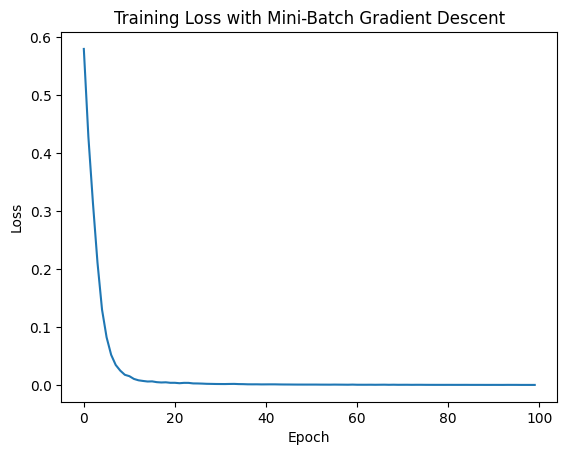

Test Accuracy: 1.0


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Filter to use only two classes (binary classification)
X = X[y != 2]
y = y[y != 2]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Create DataLoader for random mini-batch
batch_size = 16
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the Neural Network model
class BinaryClassificationNN(nn.Module):
    def __init__(self):
        super(BinaryClassificationNN, self).__init__()
        self.fc1 = nn.Linear(4, 16)  # Input layer to hidden layer
        self.fc2 = nn.Linear(16, 1)  # Hidden layer to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation
        x = torch.sigmoid(self.fc2(x))  # Apply Sigmoid activation
        return x

# Initialize the model, loss function, and optimizer
model = BinaryClassificationNN()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model with mini-batch gradient descent
num_epochs = 100
train_losses = []

for epoch in range(num_epochs):
    epoch_loss = 0.0
    model.train()
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    train_losses.append(epoch_loss / len(train_loader))

# Testing the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    predictions = (test_outputs > 0.5).float()
    accuracy = (predictions == y_test_tensor).float().mean()

# Plot the training loss
plt.plot(train_losses)
plt.title('Training Loss with Mini-Batch Gradient Descent')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

print(f"Test Accuracy: {accuracy.item()}")
